<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).

- **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.

3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).


In [1]:
# Check for GPU
!nvidia-smi

Sun Jun  2 11:35:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   35C    P8             11W /   95W |     188MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?


- Automated driving
- Agriculture
- Healthcare


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.


Overfitting is the condition of a model where it trains too well on the patterns of training data and cannot detect the patterns in test/validation/unseen data


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.


- Implement regularization
- Increase training dataset
- Implement data augmentation


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

- Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.


In [36]:
from torchvision.datasets import MNIST
from torchvision import transforms

train_data = MNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = MNIST(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)
class_names = train_data.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.


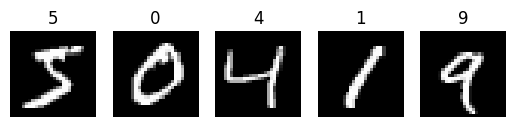

In [24]:
import matplotlib.pyplot as plt

for i in range(5):

    plt.subplot(1, 5, i + 1)
    plt.imshow(train_data[i][0].squeeze(), cmap="gray")
    plt.title(train_data[i][1])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.


In [27]:
from torch.utils.data import DataLoader

BATCH = 32

train_loader = DataLoader(
    batch_size=32,
    shuffle=True,
    dataset=train_data,
)
test_loader = DataLoader(
    batch_size=32,
    shuffle=False,
    dataset=test_data,
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.


In [69]:
from torch import nn


class MNIST_model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,  # how big is the square that's going over the image?
                stride=1,  # default
                padding=1,
            ),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2, stride=2
            ),  # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [70]:
model = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names),
).to(device)

model_cpu = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names),
).to("cpu")

In [101]:
dummy_tensor = torch.rand(1, 1, 28, 28).to(device)

test = model(dummy_tensor)
test

tensor([[-2.1078, -1.3632, -0.0568,  1.2582, -0.5556,  4.3972, -0.1969, -0.3044,
         -0.5961,  0.1569]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.


- GPU training


In [76]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torchmetrics import Accuracy

loss_fn_gpu = CrossEntropyLoss()
optimizer_gpu = SGD(model.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [78]:
from tqdm.auto import tqdm

epochs = 5
# Training loop
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = 0, 0
    model.train()
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        y_preds = model(X)
        loss = loss_fn_gpu(y_preds, y)
        accuracy = accuracy_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy
        optimizer_gpu.zero_grad()
        loss.backward()
        optimizer_gpu.step()
    train_loss /= len(train_loader)  # average train_loss from each batch of data
    train_acc /= len(train_loader)

    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            loss = loss_fn_gpu(test_preds, y)
            accuracy = accuracy_fn(test_preds, y)
            test_loss += loss
            test_acc += accuracy

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
    print(
        f"\nTrain Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f} \nTest Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}"
    )

  0%|          | 0/5 [00:00<?, ?it/s]


Train Loss: 0.07338 | Train Accuracy: 0.98 
Test Loss: 0.05310 | Test Accuracy: 0.98

Train Loss: 0.05730 | Train Accuracy: 0.98 
Test Loss: 0.04739 | Test Accuracy: 0.98

Train Loss: 0.04737 | Train Accuracy: 0.98 
Test Loss: 0.03805 | Test Accuracy: 0.99

Train Loss: 0.04200 | Train Accuracy: 0.99 
Test Loss: 0.03717 | Test Accuracy: 0.99

Train Loss: 0.03761 | Train Accuracy: 0.99 
Test Loss: 0.03894 | Test Accuracy: 0.99
Start time:380529.9839595 | End time:380633.816385)


- CPU training


In [79]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torchmetrics import Accuracy

loss_fn_cpu = CrossEntropyLoss()
optimizer_cpu = SGD(model_cpu.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [81]:
from tqdm.auto import tqdm

device = "cpu"
epochs = 5
# Training loop
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = 0, 0
    model_cpu.train()
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        y_preds = model_cpu(X)
        loss = loss_fn_cpu(y_preds, y)
        accuracy = accuracy_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy
        optimizer_cpu.zero_grad()
        loss.backward()
        optimizer_cpu.step()
    train_loss /= len(train_loader)  # average train_loss from each batch of data
    train_acc /= len(train_loader)

    test_loss = 0
    test_acc = 0
    model_cpu.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            test_preds = model_cpu(X)
            loss = loss_fn_cpu(test_preds, y)
            accuracy = accuracy_fn(test_preds, y)
            test_loss += loss
            test_acc += accuracy

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
    print(
        f"\nTrain Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f} \nTest Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}"
    )

  0%|          | 0/5 [00:00<?, ?it/s]


Train Loss: 0.28684 | Train Accuracy: 0.91 
Test Loss: 0.06615 | Test Accuracy: 0.98

Train Loss: 0.07127 | Train Accuracy: 0.98 
Test Loss: 0.05060 | Test Accuracy: 0.99

Train Loss: 0.05514 | Train Accuracy: 0.98 
Test Loss: 0.04277 | Test Accuracy: 0.99

Train Loss: 0.04714 | Train Accuracy: 0.99 
Test Loss: 0.04546 | Test Accuracy: 0.98

Train Loss: 0.04178 | Train Accuracy: 0.99 
Test Loss: 0.03621 | Test Accuracy: 0.99


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.


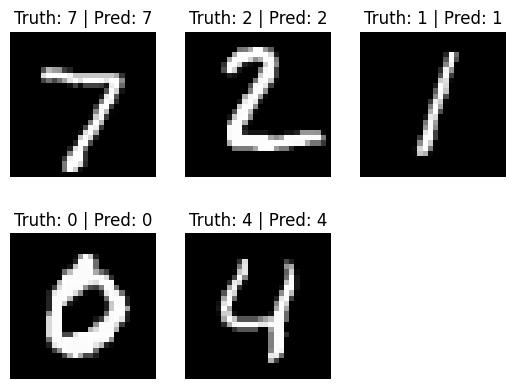

In [92]:
device = "cuda" if torch.cuda.is_available() else "cpu"
num_to_plot = 5
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = model(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    plt.subplot(2, 3, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.


In [129]:
dummy = torch.rand(1, 28, 28).to(device)
logit = model(dummy.unsqueeze(dim=0)).squeeze()
pred = torch.softmax(logit, dim=0).argmax()
pred

tensor(3, device='cuda:0')

In [130]:
model_preds = []
model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_loader, desc="Making preds..."):
        X, y = X.to(device), y.to(device)
        y_logit = model(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        model_preds.append(y_pred.cpu())

model_preds_tensor = torch.cat(model_preds)
model_preds_tensor

Making preds...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 8, 6])

In [133]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = conf_matrix(
    preds=model_preds_tensor,
    target=test_data.targets,
)
confmat_tensor

tensor([[ 948,    4,    2,    0,    1,    2,   12,    3,    6,    2],
        [   0, 1125,    3,    1,    1,    0,    5,    0,    0,    0],
        [  16,   73,  906,    9,    1,    0,    2,   13,   10,    2],
        [   3,   11,   16,  905,    0,   38,    1,   10,   18,    8],
        [   3,   60,    1,    0,  862,    3,    7,   10,    5,   31],
        [   1,    7,    2,   22,    0,  775,   20,    5,   22,   38],
        [  10,    8,    1,    0,    5,   13,  917,    0,    4,    0],
        [   2,   38,   12,    8,    6,    2,    0,  937,    2,   21],
        [   8,   16,   16,    6,    5,   10,    8,    4,  889,   12],
        [   3,   11,    1,    2,   27,    4,    3,   16,    8,  934]])

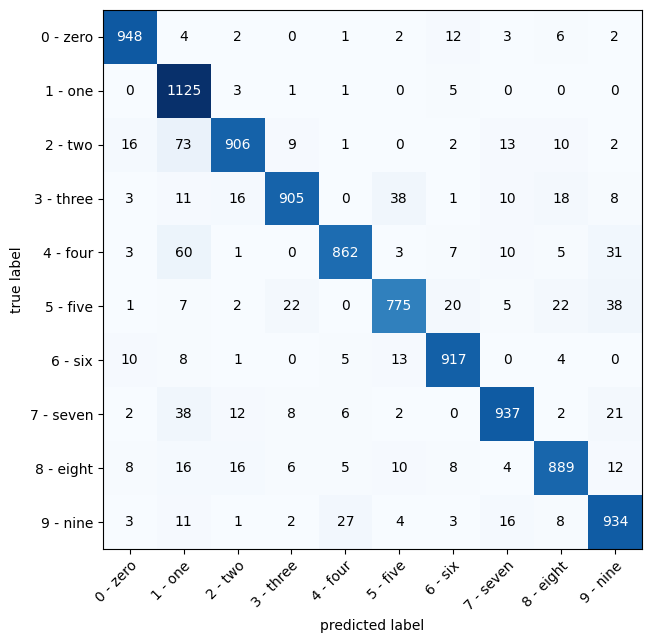

In [135]:
fig, ax = plot_confusion_matrix(
    confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7),
)